In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data into a Pandas DataFrame
artists = pd.read_csv('spotify_artist_data_2023.csv')
playlists = pd.read_csv('spotify_data_12_20_2023.csv')
features = pd.read_csv('spotify_features_data_2023.csv')
tracks = pd.read_csv('spotify_tracks_data_2023.csv')
albums = pd.read_csv('spotify-albums_data_2023.csv')

# Print the shape of each DataFrame
print(f"Artists: {artists.shape}")
print(f"Playlists: {playlists.shape}")
print(f"Features: {features.shape}")
print(f"Tracks: {tracks.shape}")
print(f"Albums: {albums.shape}")

# Print the first few rows of each DataFrame
print("\nArtists:")
print(artists.head())
print("\nPlaylists:")
print(playlists.head())
print("\nFeatures:")
print(features.head())
print("\nTracks:")
print(tracks.head())
print("\nAlbums:")
print(albums.head())

# Check for missing values in each DataFrame
print("\nMissing Values:")
print(artists.isnull().sum())
print(playlists.isnull().sum())
print(features.isnull().sum())
print(tracks.isnull().sum())
print(albums.isnull().sum())

# Check if there are any missing values left
print("Missing values in 'artists':\n", artists.isnull().sum())
print("\nMissing values in 'playlists':\n", playlists.isnull().sum())
print("\nMissing values in 'features':\n", features.isnull().sum())
print("\nMissing values in 'tracks':\n", tracks.isnull().sum())
print("\nMissing values in 'albums':\n", albums.isnull().sum())


C:\Users\Aditya A Mehta\AppData\Local\Temp\ipykernel_12224\629948669.py:8: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  playlists = pd.read_csv('spotify_data_12_20_2023.csv')


Artists: (37012, 12)
Playlists: (375141, 49)
Features: (438112, 18)
Tracks: (438938, 3)
Albums: (438973, 26)

Artists:
                       id                   name  artist_popularity  \
0  6GkSLJj5CGLIckLIb8J4LR      Late Night Fights                  0   
1  1N0VwQy5PRJymrRvlRzDIj       Sub Par All Star                  0   
2  4Ch4BIKKwMJsiu1oVLDwpX  Nirvana Meditation 8D                  0   
3  5h2iINTOvhghVcpIzrztPP      Red Hot Rebellion                  0   
4  7dE2MLL2SaI6MujpU5HFVi   Nirvana Tribute Band                  0   

          artist_genres  followers           genre_0 genre_1 genre_2 genre_3  \
0  ['minneapolis punk']        184  minneapolis punk     NaN     NaN     NaN   
1     ['antiviral pop']        491     antiviral pop     NaN     NaN     NaN   
2                ['8d']         56                8d     NaN     NaN     NaN   
3       ['action rock']        394       action rock     NaN     NaN     NaN   
4           ['tribute']        230           tribute  

In [6]:
# Handle missing values
artists.fillna(0, inplace=True)
playlists.fillna(0, inplace=True)
features.fillna(0, inplace=True)
tracks.fillna(0, inplace=True)
albums.fillna(0, inplace=True)

# Handle outliers
features = features[features['danceability'] <= 1]
features = features[features['energy'] <= 1]
features = features[features['key'] <= 11]
features = features[features['loudness'] >= -60]
features = features[features['mode'] <= 1]
features = features[features['speechiness'] <= 1]
features = features[features['acousticness'] <= 1]
features = features[features['instrumentalness'] <= 1]
features = features[features['liveness'] <= 1]
features = features[features['valence'] <= 1]
features = features[features['tempo'] <= 250]

# Handle errors
tracks = tracks[tracks['track_popularity'] <= 100]

# Print the shape of each DataFrame
print(f"Artists: {artists.shape}")
print(f"Playlists: {playlists.shape}")
print(f"Features: {features.shape}")
print(f"Tracks: {tracks.shape}")
print(f"Albums: {albums.shape}")

Artists: (37012, 12)
Playlists: (375141, 49)
Features: (438112, 18)
Tracks: (438938, 3)
Albums: (438973, 26)


First few rows of Artists dataframe:
                       id                   name  artist_popularity  \
0  6GkSLJj5CGLIckLIb8J4LR      Late Night Fights                  0   
1  1N0VwQy5PRJymrRvlRzDIj       Sub Par All Star                  0   
2  4Ch4BIKKwMJsiu1oVLDwpX  Nirvana Meditation 8D                  0   
3  5h2iINTOvhghVcpIzrztPP      Red Hot Rebellion                  0   
4  7dE2MLL2SaI6MujpU5HFVi   Nirvana Tribute Band                  0   

          artist_genres  followers           genre_0 genre_1 genre_2 genre_3  \
0  ['minneapolis punk']        184  minneapolis punk       0       0       0   
1     ['antiviral pop']        491     antiviral pop       0       0       0   
2                ['8d']         56                8d       0       0       0   
3       ['action rock']        394       action rock       0       0       0   
4           ['tribute']        230           tribute       0       0       0   

  genre_4  genre_5  genre_6  
0       0      0.0      0

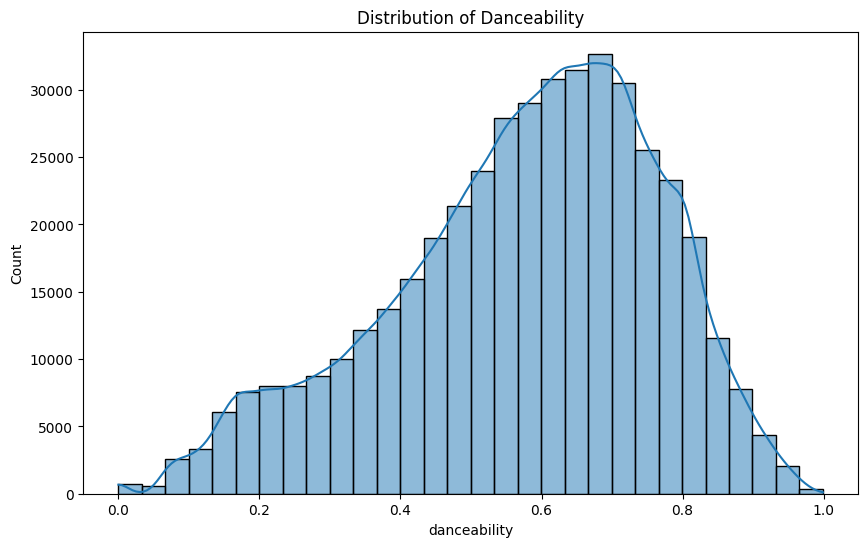

In [8]:
dfs = [artists, playlists, features, tracks, albums]
df_names = ['Artists', 'Playlists', 'Features', 'Tracks', 'Albums']

# Display the first few rows of each dataframe
for df, name in zip(dfs, df_names):
    print(f"First few rows of {name} dataframe:")
    print(df.head())
    print("\n")

# Generate summary statistics for each dataframe
for df, name in zip(dfs, df_names):
    print(f"Summary statistics for {name} dataframe:")
    print(df.describe(include='all'))
    print("\n")

# For visualizations, let's take an example of 'Features' dataframe
# We'll create a histogram for 'danceability' feature
plt.figure(figsize=(10, 6))
sns.histplot(features['danceability'], kde=True, bins=30)
plt.title('Distribution of Danceability')
plt.show()

In [7]:
#More of handling missing values
# Replace missing values with NaN
artists.replace("", np.nan, inplace=True)
playlists.replace("", np.nan, inplace=True)
features.replace("", np.nan, inplace=True)
tracks.replace("", np.nan, inplace=True)
albums.replace("", np.nan, inplace=True)


# Drop the rows where at least one element is missing
artists.dropna(inplace=True)
playlists.dropna(inplace=True)
features.dropna(inplace=True)
tracks.dropna(inplace=True)
albums.dropna(inplace=True)

In [8]:
# Check if there are any missing values left
print("Missing values in 'artists':\n", artists.isnull().sum())
print("\nMissing values in 'playlists':\n", playlists.isnull().sum())
print("\nMissing values in 'features':\n", features.isnull().sum())
print("\nMissing values in 'tracks':\n", tracks.isnull().sum())
print("\nMissing values in 'albums':\n", albums.isnull().sum())


Missing values in 'artists':
 id                   0
name                 0
artist_popularity    0
artist_genres        0
followers            0
genre_0              0
genre_1              0
genre_2              0
genre_3              0
genre_4              0
genre_5              0
genre_6              0
dtype: int64

Missing values in 'playlists':
 album_id             0
album_name           0
album_popularity     0
album_type           0
artists              0
artist_0             0
artist_1             0
artist_2             0
artist_3             0
artist_4             0
artist_id            0
duration_sec         0
label                0
release_date         0
total_tracks         0
track_id             0
track_name           0
track_number         0
artist_genres        0
artist_popularity    0
followers            0
name                 0
genre_0              0
genre_1              0
genre_2              0
genre_3              0
genre_4              0
acousticness         0
anal

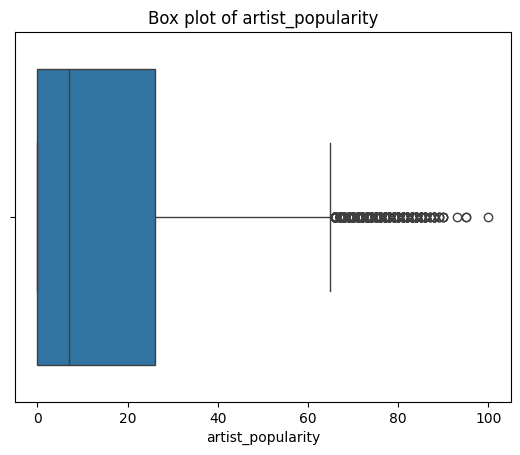

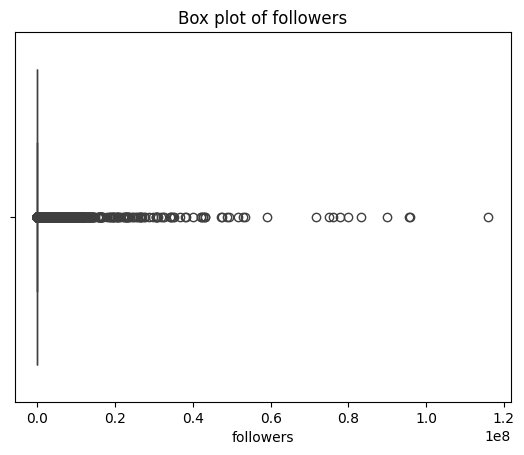

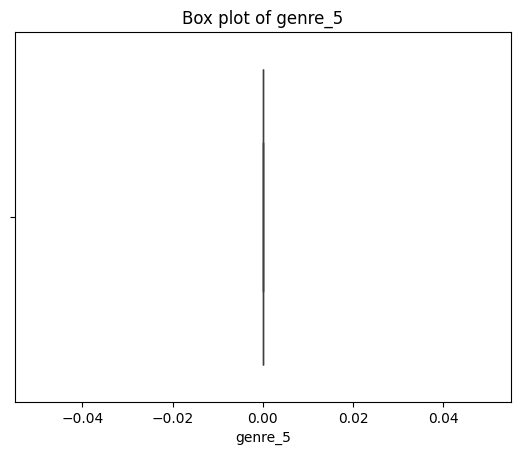

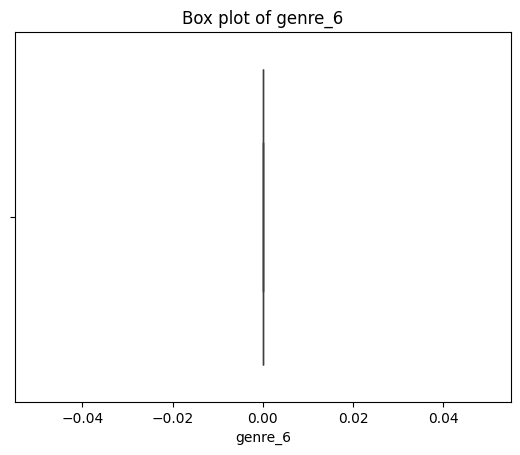

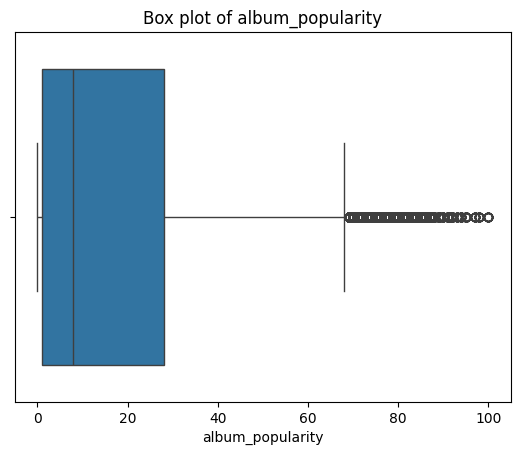

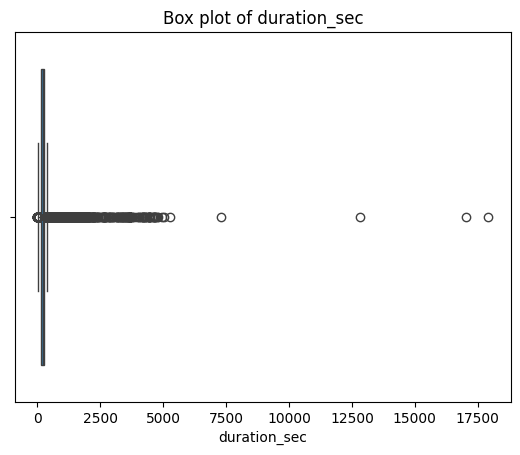

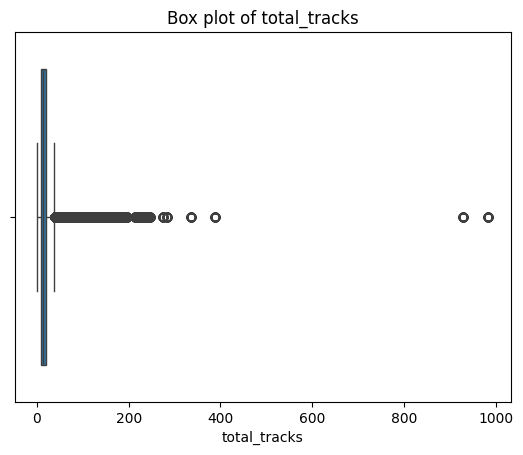

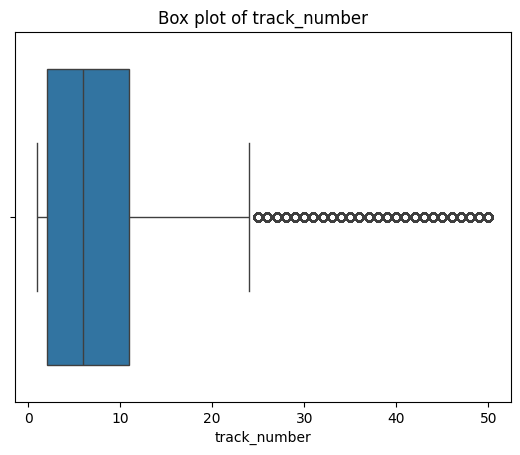

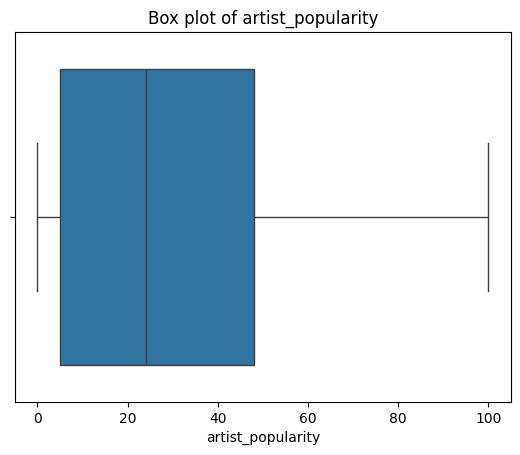

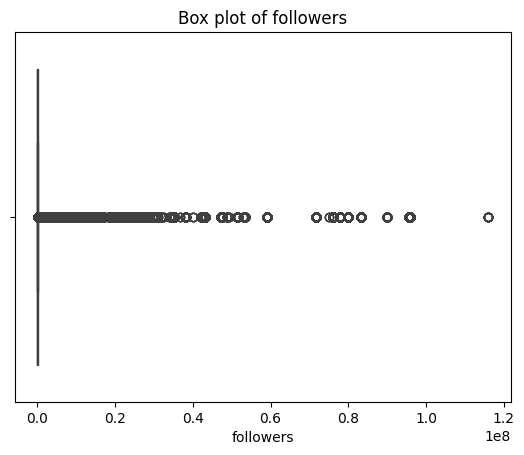

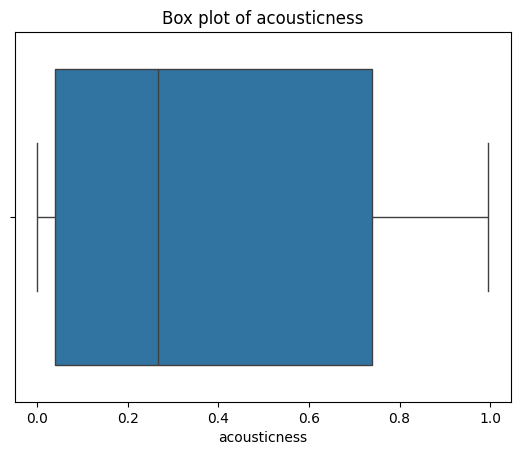

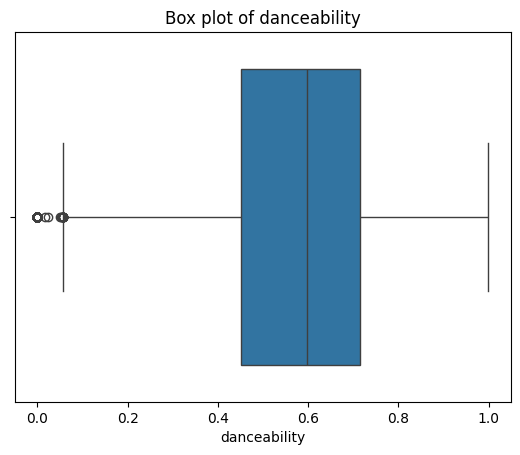

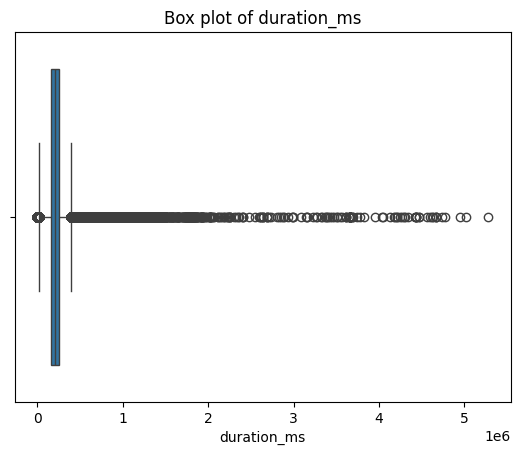

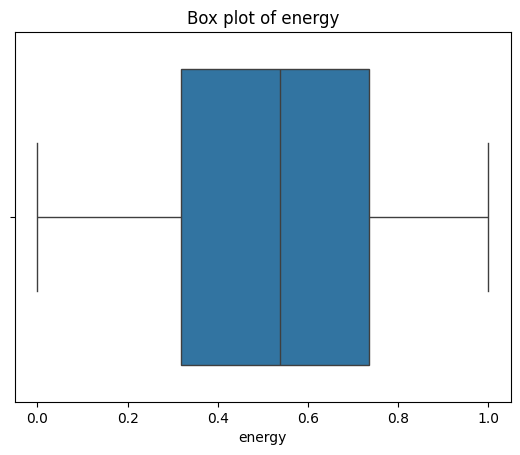

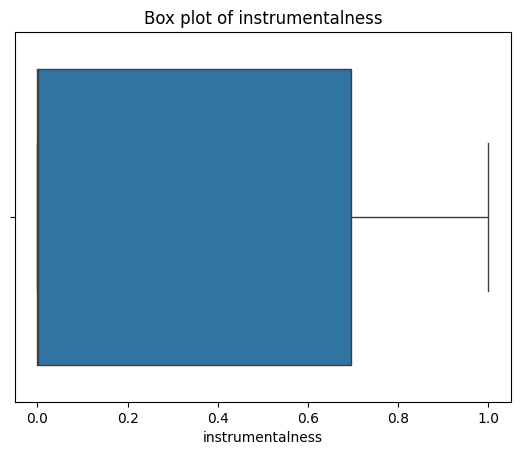

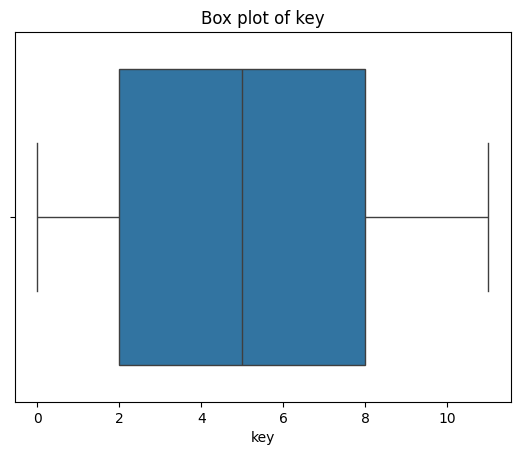

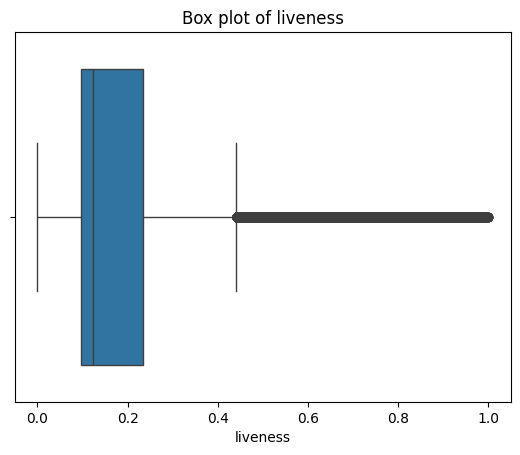

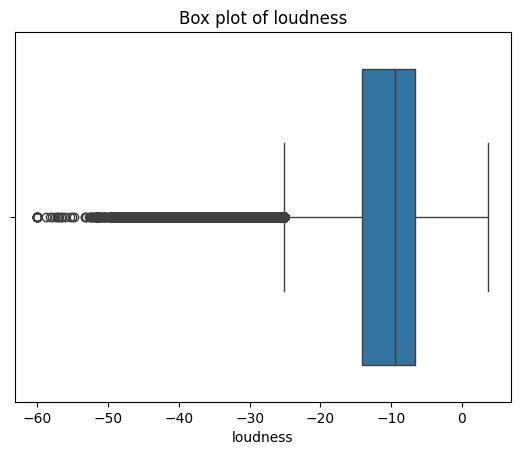

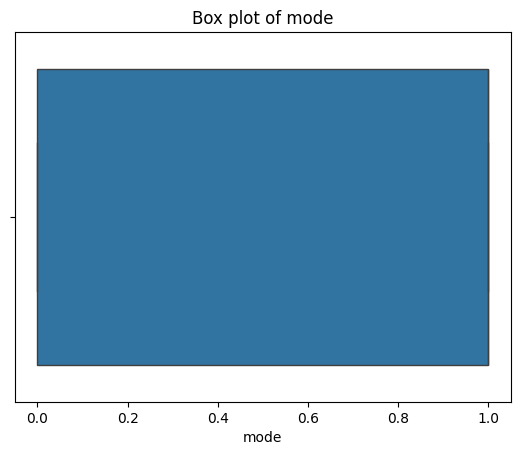

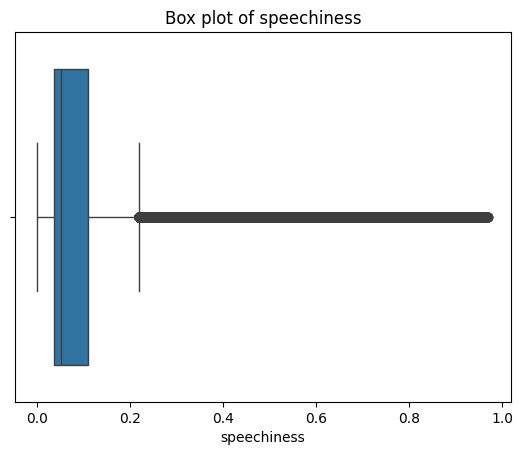

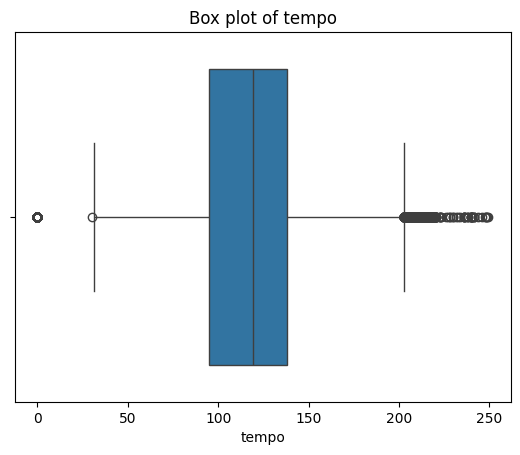

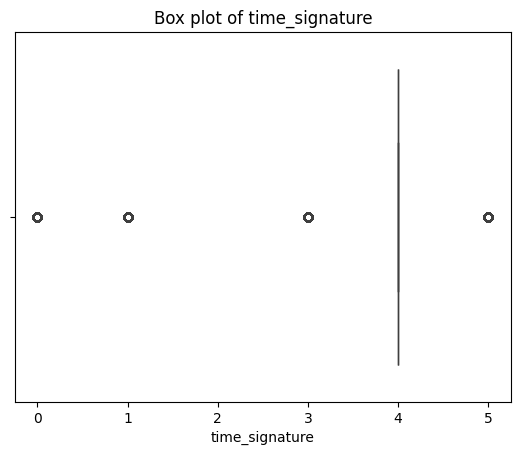

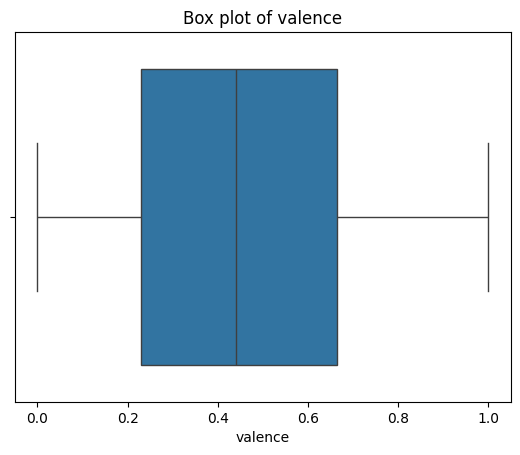

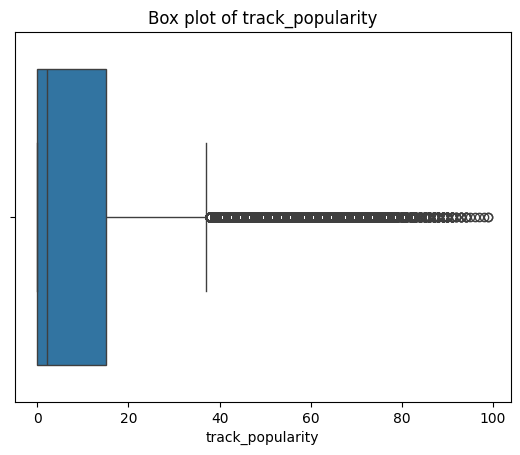

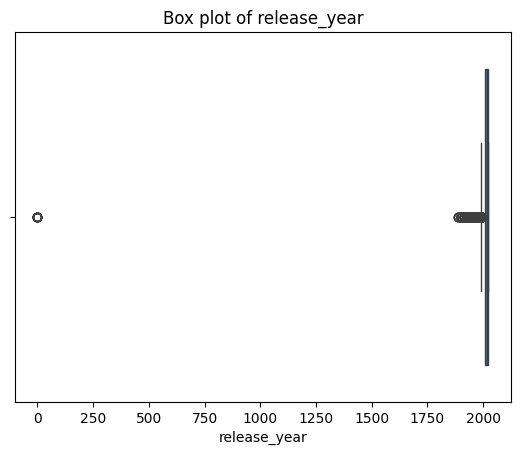

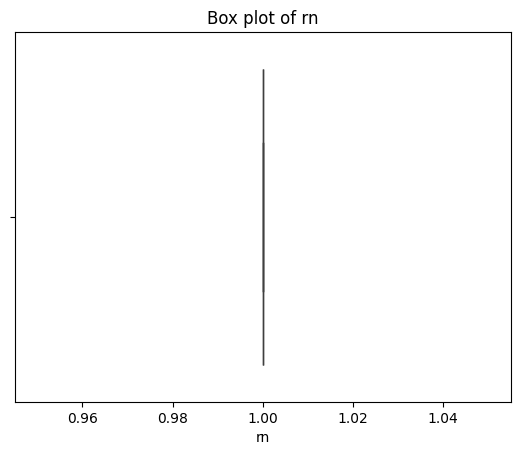

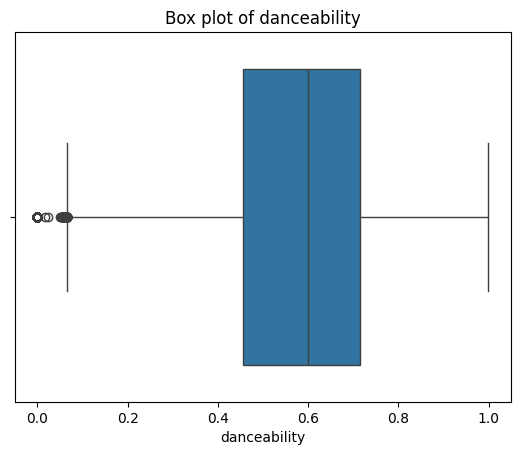

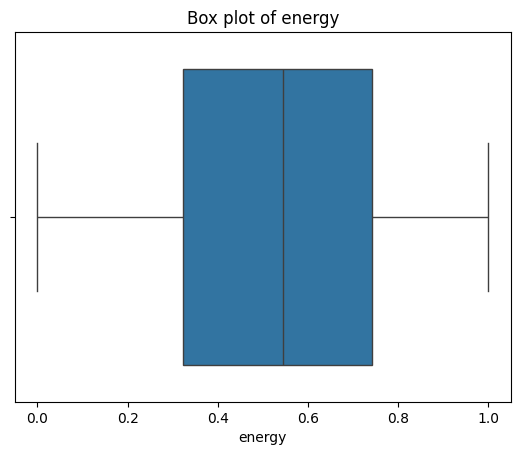

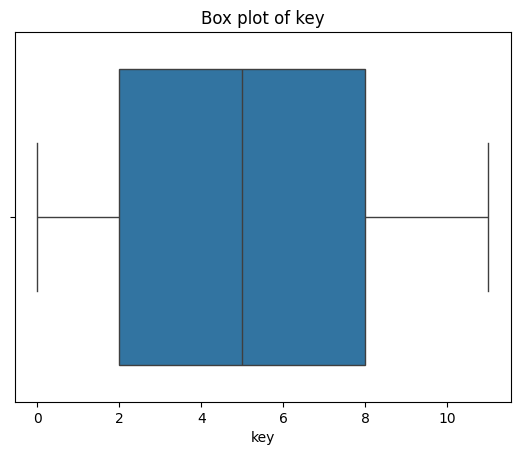

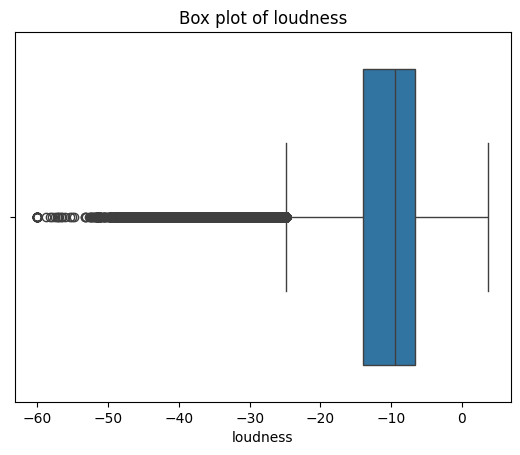

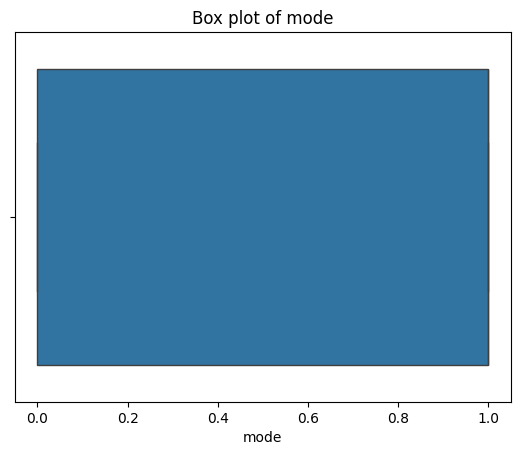

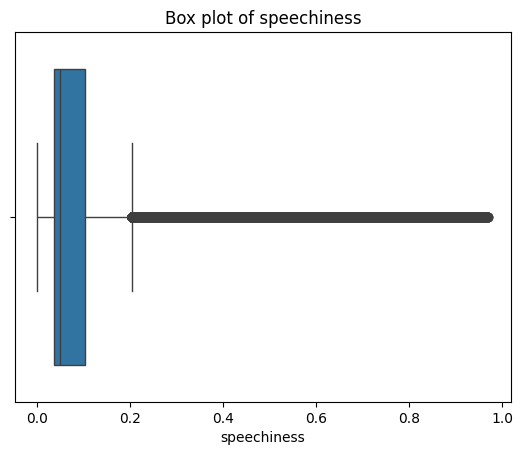

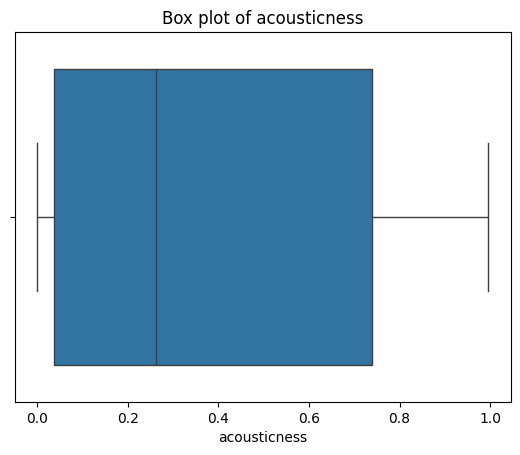

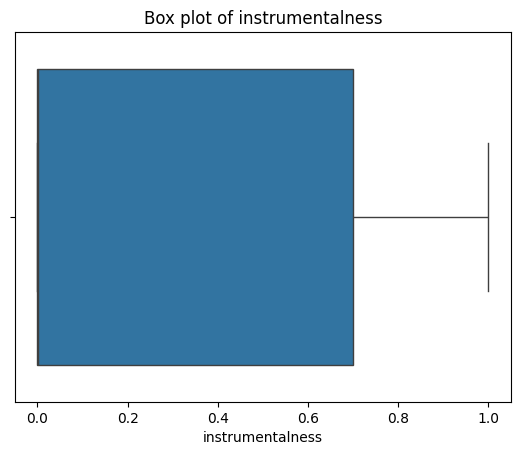

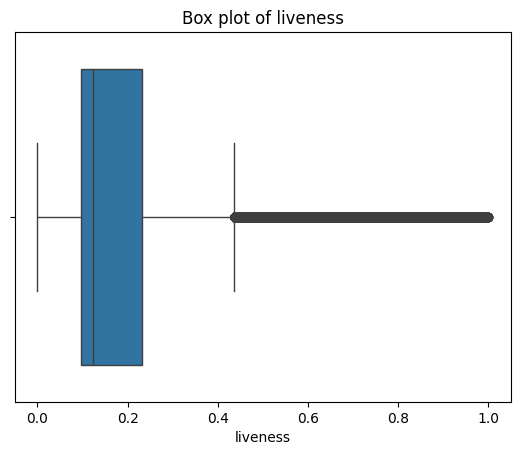

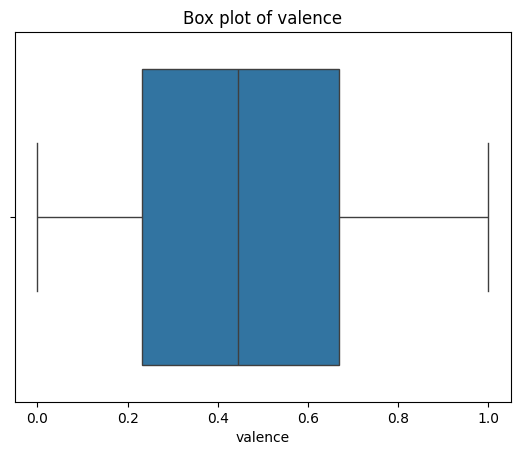

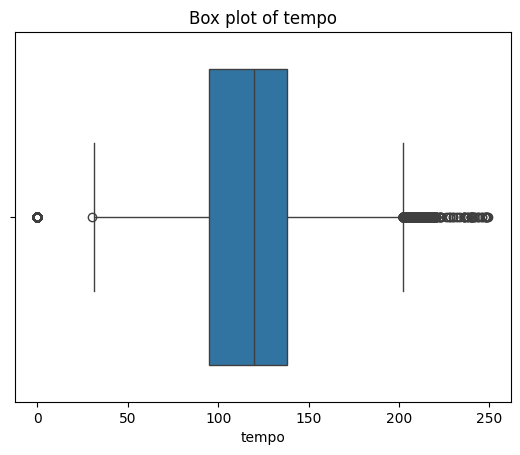

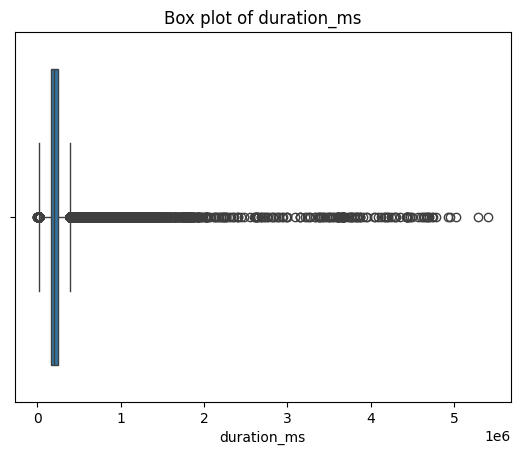

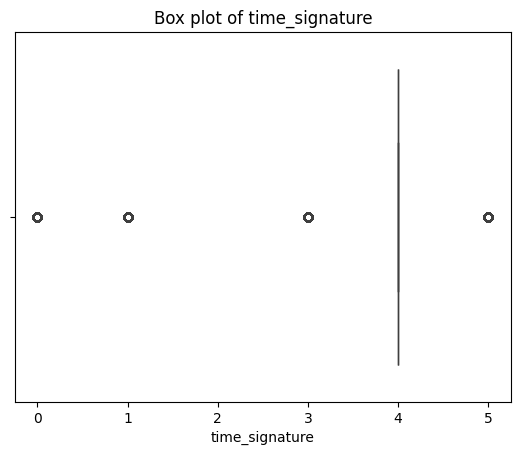

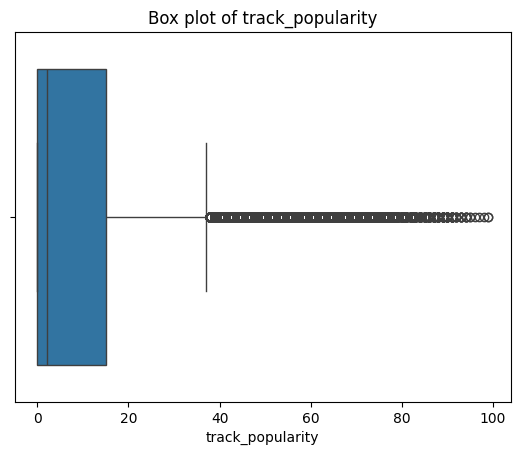

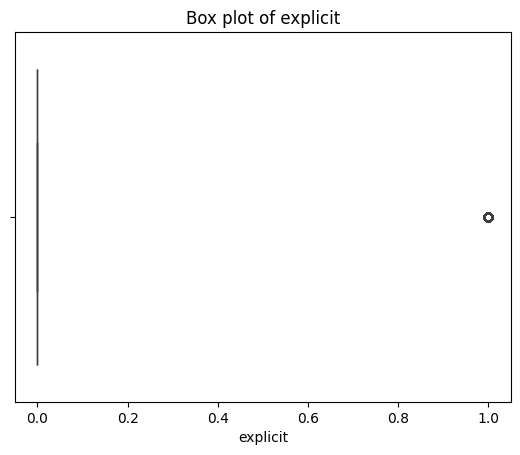

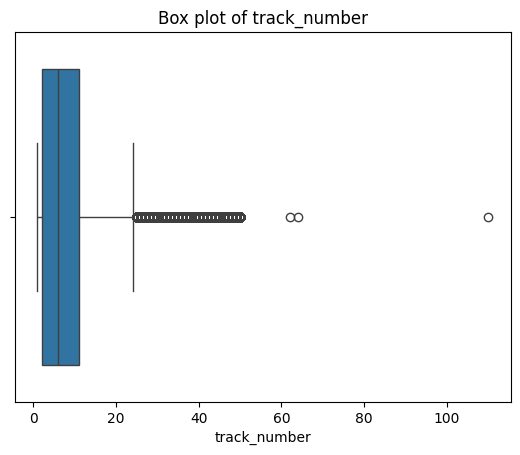

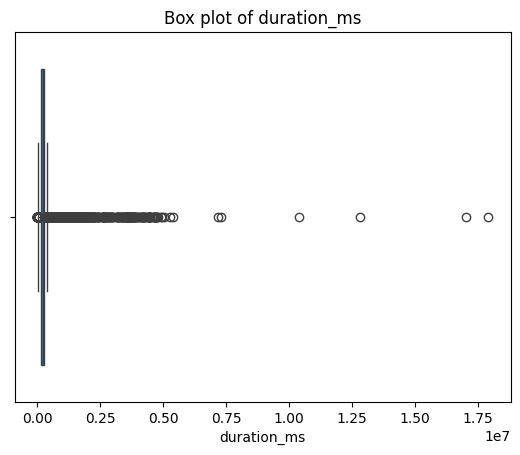

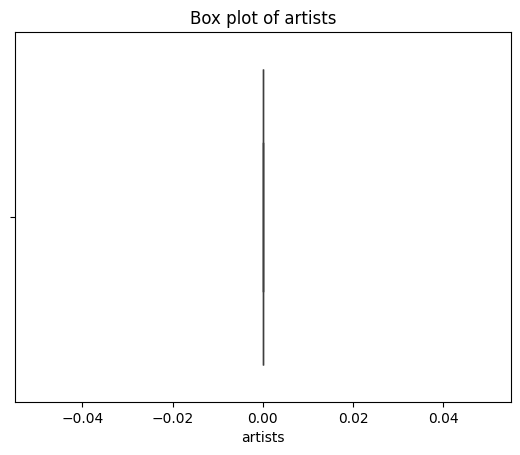

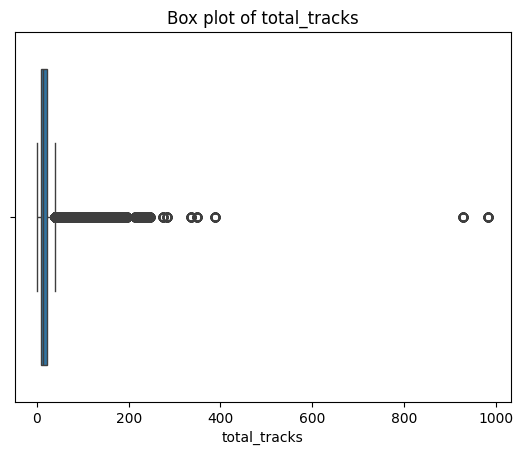

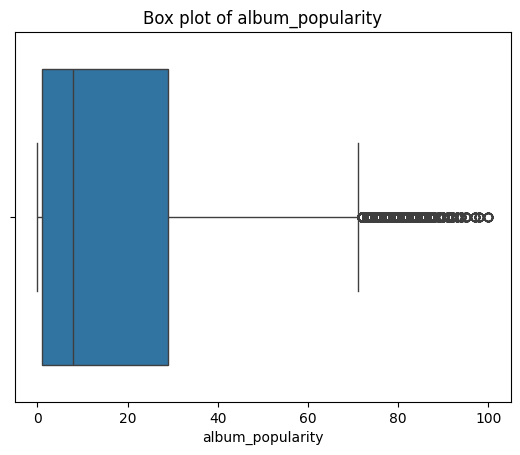

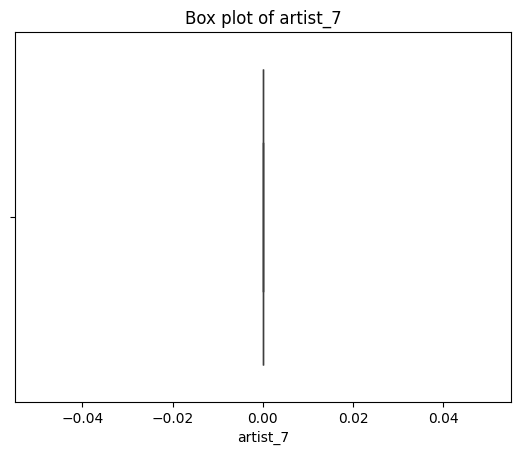

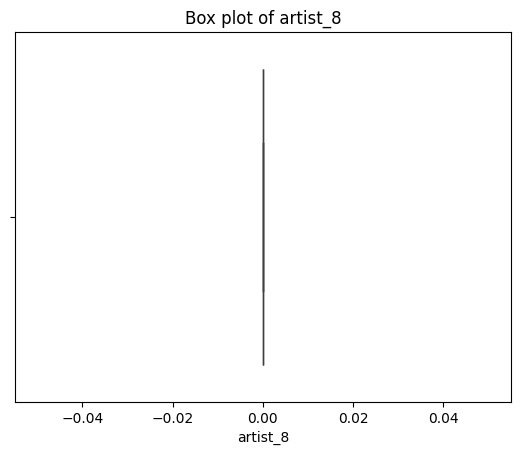

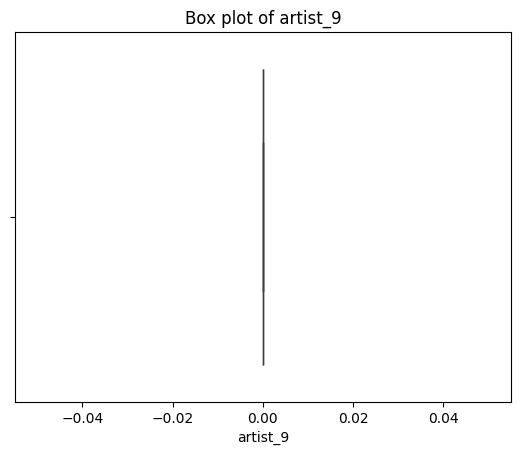

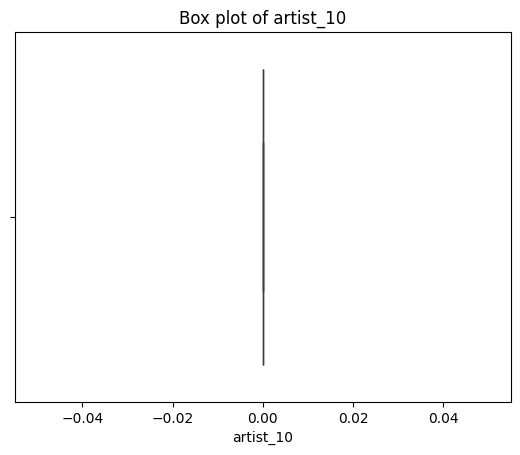

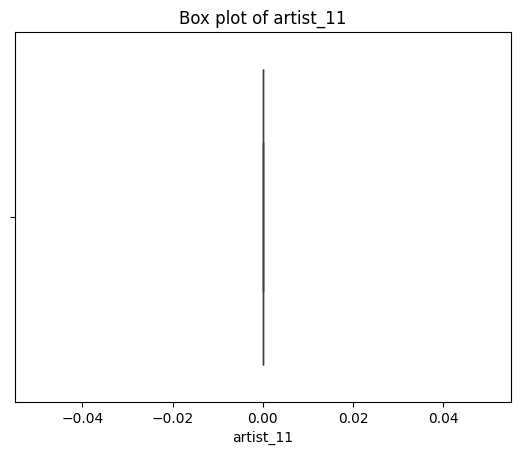

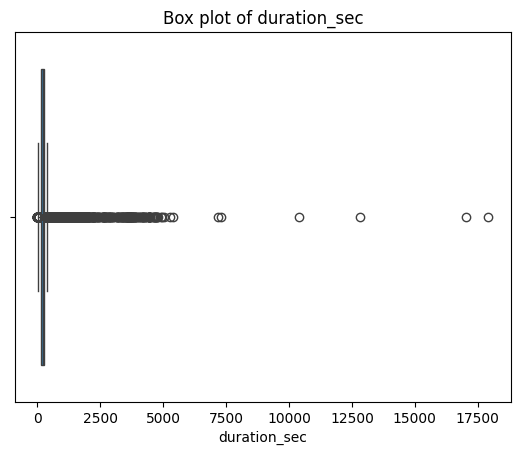

In [9]:
dfs = [artists, playlists, features, tracks, albums]

# For each dataframe
for df in dfs:
    # For each column in the dataframe
    for col in df.columns:
        # If the column data type is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            # Create a box plot
            sns.boxplot(x=df[col])
            plt.title(f'Box plot of {col}')
            plt.show()

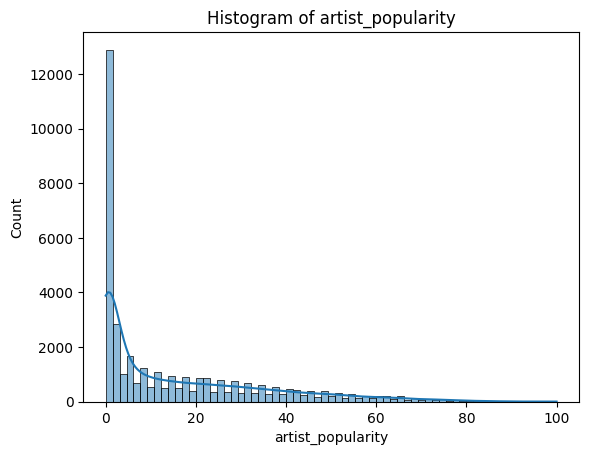

KeyboardInterrupt: 

In [10]:
# For each dataframe
for df in dfs:
    # For each column in the dataframe
    for col in df.columns:
        # If the column data type is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            # Create a histogram
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f'Histogram of {col}')
            plt.show()